In [66]:
import pandas as pd
import numpy as np
import sklearn

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb

import scipy.stats as ss

In [68]:
from IPython.display import display

In [69]:
# grep -v ,,,, cancel1.csv >cancel2.csv
# delete ,,,, rows on linux command

data = pd.read_csv('cancel2.csv')

In [70]:
pd.options.display.max_columns = None
data.head()
data.dtypes

mon                           object
state                         object
originalagency                object
speed                         object
wirecenter                    object
InstallType                   object
competitorname                object
ContractType                  object
salesrepid                    object
order_create_date             object
canceldate                    object
endclientsystem               object
hfws_ind                      object
due_date                      object
FIRSTOFFEREDDATE              object
waitingdayofcustomers         object
waitingdayforcompany          object
BUNDLE                        object
BundleType                    object
ONTRequired                   object
ONTInstall                    object
strOrderType                  object
strIsWinbackIndicator         object
notruckrollrequiredreason     object
droptype                      object
premisetype                   object
ONTselfinstallcapable         object
s

In [71]:
data['hfws_ind'].isnull().sum()

49921

In [72]:
data.strIsWinbackIndicator.replace(np.nan, 'NO' ,inplace=True)

In [73]:
data.hfws_ind.replace(np.nan, 'N' ,inplace=True)

In [74]:
data.ONTselfinstallcapable.replace(np.nan, 'N' ,inplace=True)

In [75]:
data.cancel_ind.replace(np.nan, 0 ,inplace=True)

In [76]:
data.waitingdayofcustomers.replace('#VALUE!', np.nan ,inplace=True)

In [77]:
data.waitingdayforcompany.replace('#VALUE!', np.nan ,inplace=True)
data.canceldate.replace(np.datetime64('today'),np.nan,inplace=True)

In [78]:
data.head(100)


mon state                         originalagency  \
0   NY11345685302    NY                       REDVENT: REDVENT   
1   MD11346031526    MD                             CSSC: CSSC   
2   PA11346211594    PA                         ONLINE: ONLINE   
3   VA11346969162    VA                             CSSC: CSSC   
4   NY11345471806    NY                         ONLINE: ONLINE   
5   VA11345543843    VA                         ONLINE: ONLINE   
6   VA11345571342    VA                             CSSC: CSSC   
7   RI11345574847    RI  RVCART: RED VENTURES CART PAID SEARCH   
8   NY11345490874    NY                         ONLINE: ONLINE   
9   DC11345486467    DC                         ONLINE: ONLINE   
10  PA11345603049    PA                       REDVENT: REDVENT   
11  MD11345484110    MD  RVCART: RED VENTURES CART PAID SEARCH   
12  NY11345502661    NY                         ONLINE: ONLINE   
13  NY11345545975    NY  RVCART: RED VENTURES CART PAID SEARCH   
14  PA11345605777    PA                       REDVENT: REDVENT   
15  VA11345630367    VA                         ONLINE: ONLINE   
16  RI11345605672    RI                       REDVENT: REDVENT   
17  NY11345610847    NY                             CSSC: CSSC   
18  RI11345493518    RI                             CSSC: CSSC   
19  NY11345544118    NY                             CSSC: CSSC   
20  NY11345516541    NY                             CSSC: CSSC   
21  MD11345574242    MD                             CSSC: CSSC   
22  PA11345621041    PA                             CSSC: CSSC   
23  PA11345673754    PA                       REDVENT: REDVENT   
24  NY11345525372    NY                             CSSC: CSSC   
25  NY11347027469    NY                         ONLINE: ONLINE   
26  MA11346441315    MA                         ONLINE: ONLINE   
27  NY11345989429    NY                             CSSC: CSSC   
28  NJ11345519508    NJ                             CSSC: CSSC   
29  MD11345630354    MD                             CSSC: CSSC   
..            ...   ...                                    ...   
70  PA11347001435    PA                             CSSC: CSSC   
71  MD11346808679    MD                             CSSC: CSSC   
72  PA11346910349    PA                             CSSC: CSSC   
73  NJ11347061400    NJ             CLCART: CLEARLINK PARTNERS   
74  NY11347042304    NY                             CSSC: CSSC   
75  RI11346988572    RI                             CSSC: CSSC   
76  NJ11347265520    NJ                         ONLINE: ONLINE   
77  PA11346990187    PA                             CSSC: CSSC   
78  PA11347012704    PA                             CSSC: CSSC   
79  NJ11346894247    NJ                             CSSC: CSSC   
80  RI11347071010    RI                             CSSC: CSSC   
81  NJ11346979511    NJ                             CSSC: CSSC   
82  NJ11346936194    NJ                             CSSC: CSSC   
83  NJ11346939750    NJ                             CSSC: CSSC   
84  NY11346961858    NY                               BSC: BSC   
85  NJ11346998235    NJ                             CSSC: CSSC   
86  PA11347049869    PA                             CSSC: CSSC   
87  NJ11347046521    NJ                             CSSC: CSSC   
88  NY11346931074    NY                             CSSC: CSSC   
89  VA11346989263    VA                             CSSC: CSSC   
90  NJ11346786673    NJ                               BSC: BSC   
91  NY11347046545    NY                             CSSC: CSSC   
92  MD11347095583    MD                             CSSC: CSSC   
93  MD11347739641    MD                             CSSC: CSSC   
94  VA11346816306    VA                             CSSC: CSSC   
95  NJ11345910659    NJ                             CSSC: CSSC   
96  RI11347040866    RI                             CSSC: CSSC   
97  NJ11347035152    NJ                             CSSC: CSSC   
98  NY11347004493    NY                             CS

In [79]:
del data['canceldate']

In [80]:
del data['mon']

In [81]:
data.count()

state                        52156
originalagency               52156
speed                        52156
wirecenter                   52148
InstallType                  52156
competitorname               52100
ContractType                 52156
salesrepid                   51942
order_create_date            52156
endclientsystem              51973
hfws_ind                     52156
due_date                     51916
FIRSTOFFEREDDATE             50808
waitingdayofcustomers        50808
waitingdayforcompany         50779
BUNDLE                       48053
BundleType                   48053
ONTRequired                  48059
ONTInstall                   48059
strOrderType                 48059
strIsWinbackIndicator        52156
notruckrollrequiredreason     1858
droptype                     47942
premisetype                  47941
ONTselfinstallcapable        52156
saleschannel                 48059
bundlename                   52156
smartcart                    52156
cancel_ind          

In [82]:
data.dtypes

state                         object
originalagency                object
speed                         object
wirecenter                    object
InstallType                   object
competitorname                object
ContractType                  object
salesrepid                    object
order_create_date             object
endclientsystem               object
hfws_ind                      object
due_date                      object
FIRSTOFFEREDDATE              object
waitingdayofcustomers         object
waitingdayforcompany          object
BUNDLE                        object
BundleType                    object
ONTRequired                   object
ONTInstall                    object
strOrderType                  object
strIsWinbackIndicator         object
notruckrollrequiredreason     object
droptype                      object
premisetype                   object
ONTselfinstallcapable         object
saleschannel                  object
bundlename                    object
s

In [83]:

set(data[data['cancel_ind']==1].groupby('salesrepid').count()['state'].values)

a= list(data[data['cancel_ind']==0].groupby('salesrepid').count()['cancel_ind'])
a.sort(reverse=True)
a

[7590,
 2405,
 2165,
 1846,
 1194,
 1107,
 546,
 505,
 487,
 397,
 395,
 283,
 277,
 249,
 240,
 209,
 196,
 191,
 183,
 174,
 173,
 157,
 154,
 147,
 145,
 137,
 130,
 130,
 127,
 112,
 106,
 105,
 100,
 97,
 97,
 95,
 90,
 87,
 84,
 83,
 83,
 82,
 81,
 81,
 78,
 76,
 72,
 71,
 69,
 69,
 68,
 68,
 67,
 67,
 66,
 66,
 65,
 65,
 64,
 64,
 63,
 62,
 61,
 61,
 58,
 58,
 57,
 55,
 54,
 54,
 52,
 51,
 50,
 50,
 49,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 46,
 46,
 45,
 45,
 45,
 44,
 43,
 43,
 42,
 41,
 41,
 40,
 40,
 39,
 38,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 35,
 35,
 35,
 34,
 34,
 33,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 

In [84]:
del data['salesrepid']

In [85]:
data.groupby('order_create_date').count()

state  originalagency  speed  wirecenter  InstallType  \
order_create_date                                                          
2/1/18              5003            5003   5003        5003         5003   
2/10/18             2711            2711   2711        2710         2711   
2/11/18             1821            1821   1821        1820         1821   
2/12/18             5503            5503   5503        5502         5503   
2/13/18             4705            4705   4705        4704         4705   
2/2/18              4783            4783   4783        4782         4783   
2/3/18              3111            3111   3111        3111         3111   
2/4/18              1474            1474   1474        1474         1474   
2/5/18              5355            5355   5355        5355         5355   
2/6/18              4807            4807   4807        4805         4807   
2/7/18              4562            4562   4562        4561         4562   
2/8/18              3982            3982   3982        3982         3982   
2/9/18              4339            4339   4339        4339         4339   

                   competitorname  ContractType  endclientsystem  hfws_ind  \
order_create_date                                                            
2/1/18                       5001          5003             5002      5003   
2/10/18                      2704          2711             2707      2711   
2/11/18                      1818          1821             1818      1821   
2/12/18                      5501          5503             5480      5503   
2/13/18                      4699          4705             4661      4705   
2/2/18                       4780          4783             4774      4783   
2/3/18                       3107          3111             3109      3111   
2/4/18                       1474          1474             1468      1474   
2/5/18                       5351          5355             5348      5355   
2/6/18                       4804          4807             4799      4807   
2/7/18                       4558          4562             4560      4562   
2/8/18                       3971          3982             3979      3982   
2/9/18                       4332          4339             4268      4339   

                   due_date  FIRSTOFFEREDDATE  waitingdayofcustomers  \
order_create_date                                                      
2/1/18                 4997              4936                   4936   
2/10/18                2701              2630                   2630   
2/11/18                1820              1764                   1764   
2/12/18                5477              5242                   5242   
2/13/18                4659              4455                   4455   
2/2/18                 4773              4721                   4721   
2/3/18                 3109              3083                   3083   
2/4/18                 1468              1456                   1456   
2/5/18                 5345              5281                   5281   
2/6/18                 4794              4717                   4717   
2/7/18                 4534              4481                   4481   
2/8/18                 3975              3884                   3884   
2/9/18                 4264              4158                   4158   

                   waitingdayforcompany  BUNDLE  BundleType  ONTRequired  \
order_create_date                                                          
2/1/18                             4936    4621        4621         4621   
2/10/18                            2626    2545        2545         2546   
2/11/18                            1764    1744        1744         1744   
2/12/18                            5242    5024        5024         5024   
2/13/18                            4455    4262        4262         4263   
2/2/18                             4721    4420        4420         4420   
2/3/18            

In [86]:
del data['order_create_date']

In [87]:
del data['due_date']

In [88]:
del data['FIRSTOFFEREDDATE']

In [89]:
del data['BUNDLE']
# BUNDLE same as Bundle_Type

In [90]:
data[data['cancel_ind']==1].groupby('bundlename').count()['cancel_ind']
# kalsin


bundlename
1000M + Custom TV Action and Entertainment + FDV Unlim     548
1000M + Custom TV Action and Entertainment + FTTP            6
1000M + Custom TV Action and Entertainment + NO FDV         65
1000M + Custom TV Home and Family + FDV Unlim              384
1000M + Custom TV Home and Family + FTTP                     4
1000M + Custom TV Home and Family + NO FDV                  30
1000M + Custom TV Infotainment and Drama + FDV Unlim       118
1000M + Custom TV Infotainment and Drama + FTTP              2
1000M + Custom TV Infotainment and Drama + NO FDV           14
1000M + Custom TV Kids and Pop + FDV Unlim                  36
1000M + Custom TV Kids and Pop + FTTP                        1
1000M + Custom TV Kids and Pop + NO FDV                      4
1000M + Custom TV Lifestyle and Reality + FDV Unlim        292
1000M + Custom TV Lifestyle and Reality + FTTP               2
1000M + Custom TV Lifestyle and Reality + NO FDV            33
1000M + Custom TV News and Variety + FDV Unl

In [91]:
data.isnull().sum()

state                            0
originalagency                   0
speed                            0
wirecenter                       8
InstallType                      0
competitorname                  56
ContractType                     0
endclientsystem                183
hfws_ind                         0
waitingdayofcustomers         1348
waitingdayforcompany          1377
BundleType                    4103
ONTRequired                   4097
ONTInstall                    4097
strOrderType                  4097
strIsWinbackIndicator            0
notruckrollrequiredreason    50298
droptype                      4214
premisetype                   4215
ONTselfinstallcapable            0
saleschannel                  4097
bundlename                       0
smartcart                        0
cancel_ind                       0
dtype: int64

In [92]:
data[data['cancel_ind']==1].groupby('notruckrollrequiredreason').count()['cancel_ind'] 

notruckrollrequiredreason
eONTSelfInstall    222
Name: cancel_ind, dtype: int64

In [93]:
del data['notruckrollrequiredreason']

In [94]:
data.dropna(axis=0, inplace=True)

Data Label Encoding

In [95]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()


In [96]:
for x in data.columns:
    if (x!="waitingdayofcustomers") & (x!= "waitingdayforcompany"):
        le.fit(data[x])
        data[x]=le.transform(data[x])
        data[x] = data[x].astype('object')
    else:
        data[x]=data[x].astype('float')

In [97]:
data.count()

state                    46894
originalagency           46894
speed                    46894
wirecenter               46894
InstallType              46894
competitorname           46894
ContractType             46894
endclientsystem          46894
hfws_ind                 46894
waitingdayofcustomers    46894
waitingdayforcompany     46894
BundleType               46894
ONTRequired              46894
ONTInstall               46894
strOrderType             46894
strIsWinbackIndicator    46894
droptype                 46894
premisetype              46894
ONTselfinstallcapable    46894
saleschannel             46894
bundlename               46894
smartcart                46894
cancel_ind               46894
dtype: int64

In [98]:
data.head(10)

state originalagency speed wirecenter InstallType competitorname  \
0     6             17     1         74           6              2   
1     4              6     0        472           6              2   
2     7             13     1         69           6              2   
3     9              6     0        173           6              3   
4     6             13     0        346           6              0   
5     9             13     0        563           6              2   
6     9              6     0         70           6              3   
7     8             18     1        690           1              3   
8     6             13     0        603           6              7   
9     1             13     0        351           6              2   

  ContractType endclientsystem hfws_ind  waitingdayofcustomers  \
0            1               2        0                    2.0   
1            0               1        0                    3.0   
2            1              10        0                    5.0   
3            0               2        0                    6.0   
4            0              10        0                   10.0   
5            0               2        0                    3.0   
6            0               1        0                    5.0   
7            1              10        1                    9.0   
8            1              10        0                    2.0   
9            0              10        0                    3.0   

   waitingdayforcompany BundleType ONTRequired ONTInstall strOrderType  \
0                   0.0          0           0          1            1   
1                   3.0          5           0          1            1   
2                   0.0          0           0          1            1   
3                   1.0          2           1          0            0   
4                   2.0          5           0          1            1   
5                   5.0          2           0          1            0   
6                   0.0          5           0          1            0   
7                   0.0          0           0          1            1   
8                  12.0          5           0          1            0   
9                   6.0          5           1          0            1   

  strIsWinbackIndicator droptype premisetype ONTselfinstallcapable  \
0                     0        0           3                     0   
1                     0        1           3                     0   
2                     0        0           3                     0   
3                     0        1           3                     0   
4                     0        0           3                     0   
5                     0        0           3                     0   
6                     0        0           3                     0   
7                     0        0           3                     1   
8                     0        7           3                     0   
9                     0        0           3                     0   

  saleschannel bundlename smartcart cancel_ind  
0           17        338         0          0  
1            0         37         0          0  
2           12        338         1          0  
3            2         26         0          0  
4           12         33         1          0  
5            2          2         0          0  
6           17         33         0          0  
7           12        338         0          0  
8           12         42         0          0  
9           12         33         1          0

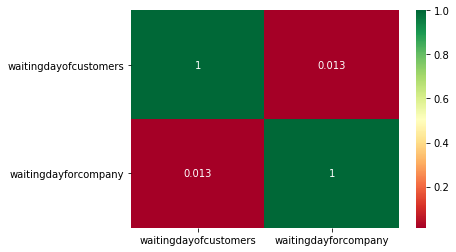

In [99]:
sb.heatmap(data.corr(),annot=True, cmap='RdYlGn')
plt.show()

split data

In [100]:
y = data['cancel_ind']
X = data.drop('cancel_ind', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

anova test

In [101]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [102]:
m=[]
for feature in train:
    if (train[feature].dtype == 'int64') | (train[feature].dtype == 'float64'):
        m.append(feature) 

In [103]:
# kolon isimlerindeki verileri degişkene alıyoruz.
numeric_data=train.loc[:, m]
numeric_data.shape

(37515, 2)

In [104]:
train.groupby('cancel_ind').size()[0]


33097

In [105]:
from scipy import stats  

f=[]
p=[]
grps= pd.unique(train.cancel_ind.values) #[0,1]
k=len(pd.unique(train.cancel_ind)) # 2
N=len(train.values) # 37.515
n= train.groupby('cancel_ind').size()[0]  #33097
for i in range(0, len(m)):
    
    d_data= {grp:train[m[i]][train.cancel_ind == grp] for grp in grps} # 
    f_val, p_val = stats.f_oneway(d_data[0],d_data[1]) 
 
    f.append(f_val)
    p.append(p_val)



In [106]:
anova_df=pd.DataFrame(f,index=m, columns=['F-value'])
anova_df['p-value']=p

anova_df.sort_values(['F-value', 'p-value'], ascending = [False, True])

F-value       p-value
waitingdayofcustomers  158.474245  2.886777e-36
waitingdayforcompany    93.657629  3.981420e-22

In [107]:
# p-values < 0.05, so these features are significant

In [108]:
data.dtypes

state                     object
originalagency            object
speed                     object
wirecenter                object
InstallType               object
competitorname            object
ContractType              object
endclientsystem           object
hfws_ind                  object
waitingdayofcustomers    float64
waitingdayforcompany     float64
BundleType                object
ONTRequired               object
ONTInstall                object
strOrderType              object
strIsWinbackIndicator     object
droptype                  object
premisetype               object
ONTselfinstallcapable     object
saleschannel              object
bundlename                object
smartcart                 object
cancel_ind                object
dtype: object

chi-square analysis

In [109]:
c=[]
for feature in train:
    if (train[feature].dtype == 'object' and feature!='cancel_ind'):
        c.append(feature) 


In [110]:
l=[]
for feature in c:
    confusion_matrix = pd.crosstab(data[feature], data.cancel_ind)
  #  print (confusion_matrix)
    conti=ss.chi2_contingency(confusion_matrix.values)
    l.append(conti[1])

In [111]:
chi_test=pd.DataFrame(l,index=c, columns=['p-values'])

chi_sorted = chi_test.sort_values(['p-values'], ascending = False)
chi_sorted

p-values
ONTselfinstallcapable   1.304731e-01
premisetype             4.443306e-09
droptype                5.924821e-11
bundlename              3.411482e-13
state                   2.648321e-19
wirecenter              7.201007e-21
strOrderType            6.633550e-24
ContractType            1.244091e-29
speed                   8.858873e-33
ONTInstall              1.832978e-34
ONTRequired             5.780769e-39
strIsWinbackIndicator   6.173310e-48
InstallType             1.210637e-49
competitorname          2.715513e-51
BundleType              2.397005e-54
hfws_ind                7.054093e-64
smartcart               5.579764e-72
originalagency          2.534018e-78
saleschannel           6.503555e-185
endclientsystem         0.000000e+00

In [112]:
# ONTselfinstallcapable will be removed, because p_value = 0,13 > 0,05
del data['ONTselfinstallcapable']

In [113]:
train.head()

state originalagency speed wirecenter InstallType competitorname  \
31622     6              6     0         31           6              0   
23604     2             17    17        402           6              2   
12094     6              6     0        281           6              0   
7692      7              6     0        409           6              2   
2225      5             13     0        428           6              0   

      ContractType endclientsystem hfws_ind  waitingdayofcustomers  \
31622            0              14        0                   10.0   
23604            1               2        0                    2.0   
12094            0               2        0                    9.0   
7692             0               2        0                    9.0   
2225             0              10        0                    4.0   

       waitingdayforcompany BundleType ONTRequired ONTInstall strOrderType  \
31622                  19.0          5           0          1            1   
23604                   0.0          2           0          1            1   
12094                  -5.0          5           0          1            1   
7692                    0.0          5           1          1            1   
2225                    0.0          5           1          0            1   

      strIsWinbackIndicator droptype premisetype ONTselfinstallcapable  \
31622                     0        0           3                     0   
23604                     0        1           3                     0   
12094                     0        4           0                     0   
7692                      1        1           3                     0   
2225                      1        0           3                     0   

      saleschannel bundlename smartcart cancel_ind  
31622            2         42         0          1  
23604           17        268         0          0  
12094            9          0         0          0  
7692             2         33         0          0  
2225            12         33         1          0

In [114]:
from sklearn.preprocessing import LabelEncoder

y=data.cancel_ind
le = LabelEncoder()
y=le.fit_transform(y)

In [115]:
data.shape

(46894, 22)

In [116]:
for x in data.columns:
    if (x!="waitingdayofcustomers") & (x!= "waitingdayforcompany"):
        le.fit(data[x])
        data[x]=le.transform(data[x])
        data[x] = data[x].astype('category')
    else:
        data[x]=data[x].astype('float')

# Feature Selection With Boruta

In [117]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


In [118]:
y=data['cancel_ind']
del data['cancel_ind']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.2, stratify=y)

In [120]:
y = y.ravel()

In [121]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.as_matrix(),y_train.as_matrix())
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.as_matrix())

/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	5
Rejected: 	2


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	5
Rejected: 	2


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	5
Rejected: 	2


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	5
Rejected: 	2


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	2


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3
Iteration: 	99 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	16
Tentative: 	1
Rejected: 	3


/Users/bulent/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
/Users/bulent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [122]:
print (feat_selector.n_features_)

16


In [123]:
feature_df = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
feature_df ['rank']=feat_selector.ranking_

In [124]:
print (feature_df.head(feat_selector.n_features_))

                 features  rank
0                   state     4
1          originalagency     1
2                   speed     1
3              wirecenter     2
4             InstallType     1
5          competitorname     1
6            ContractType     3
7         endclientsystem     1
8                hfws_ind     1
9   waitingdayofcustomers     1
10   waitingdayforcompany     1
11             BundleType     1
12            ONTRequired     1
13             ONTInstall     1
14           strOrderType     1
15  strIsWinbackIndicator     1


# Feature Selection With SelectKBest

In [125]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [126]:
selector = SelectKBest(f_classif, k = 5)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X_train, y_train)
names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

              Feat_names     F_Scores
0        endclientsystem  1718.200553
4              smartcart   285.023842
1               hfws_ind   225.757529
3  strIsWinbackIndicator   183.811436
2             BundleType   181.839031


#  Feature Selection with LinearSVC

In [127]:
from sklearn import feature_selection
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion, Pipeline

# classifier
LinearSVC1 = LinearSVC(tol=1e-4,  C = 0.10000000000000001)
f5 = feature_selection.RFE(estimator=LinearSVC1, n_features_to_select=5, step=1)

pipeline = Pipeline([
    ('rfe_feature_selection', f5),
    ('clf', LinearSVC1)
    ])

pipeline.fit(X_train, y_train)

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Pipeline(memory=None,
     steps=[('rfe_feature_selection', RFE(estimator=LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=5, step=1, ver...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [128]:
support = pipeline.named_steps['rfe_feature_selection'].support_
feature_names = np.array(X_train.columns) # transformed list to array

feature_names[support]

array(['hfws_ind', 'ONTRequired', 'strOrderType', 'strIsWinbackIndicator',
       'smartcart'], dtype=object)

#  Feature Selection with RFE

In [129]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
model = ExtraTreesClassifier()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % fit.support_ )
print("Feature Ranking: %s" % fit.ranking_ )

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bulent/anaconda3/lib/python3.6/si

Num Features: 5
Selected Features: [False False False  True False False False  True False  True  True False
 False False False False False False  True False False]
Feature Ranking: [ 3  4  7  1 17  8 13  1 14  1  1 10 16 12 11 15  5  9  1  2  6]


In [131]:
feature_names = np.array(X_train.columns) # transformed list to array
feature_names[fit.support_]

array(['wirecenter', 'endclientsystem', 'waitingdayofcustomers',
       'waitingdayforcompany', 'saleschannel'], dtype=object)

## DECISION TREE

In [135]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

In [136]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [140]:
y_predi = dt.predict(X_test)

In [141]:
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [142]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.899 

[[7761  437]
 [ 514  667]] 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8198
           1       0.60      0.56      0.58      1181

   micro avg       0.90      0.90      0.90      9379
   macro avg       0.77      0.76      0.76      9379
weighted avg       0.90      0.90      0.90      9379



## RANDOM FOREST

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
y_predi = rf.predict(X_test)

In [145]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.926 

[[8198  617]
 [  77  487]] 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8815
           1       0.44      0.86      0.58       564

   micro avg       0.93      0.93      0.93      9379
   macro avg       0.72      0.90      0.77      9379
weighted avg       0.96      0.93      0.94      9379



## LOGISTIC REGRESSION

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lr = LogisticRegression()

In [148]:
lr.fit(X_train, y_train)

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [149]:
y_predi = lr.predict(X_test)

In [150]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.911 

[[8243  807]
 [  32  297]] 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9050
           1       0.27      0.90      0.41       329

   micro avg       0.91      0.91      0.91      9379
   macro avg       0.63      0.91      0.68      9379
weighted avg       0.97      0.91      0.93      9379



## SVM

In [151]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [152]:
svm.fit(X_train, y_train)

/Users/bulent/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [153]:
y_predi=svm.predict(X_test)

In [154]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.885 

[[8265 1072]
 [  10   32]] 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9337
           1       0.03      0.76      0.06        42

   micro avg       0.88      0.88      0.88      9379
   macro avg       0.51      0.82      0.50      9379
weighted avg       0.99      0.88      0.93      9379



recall : TP/(TP+FN) - pozitiflerin ne kadarını doğru yakaladın - what percent of the positive did you catch?
precision: TP/(TP+FP)  - yaptığın positif tahminlerin ne kadarı doğru - what percent of positive predictions were correct?

<p>FN: 0 diyoruz, 1 çıkıyor
<p>T:1, F:0
<p>TP: 1 diyoruz, 1 çıkıyoruz
<p>FP: 1 diyoruz, 0 çıkıyor
<p>TN: 0 diyoruz, 0 çıkıyor

hedef: cancel edenleri daha fazla/doğru yakalamak istiyorum.
Dolayısıyla recall'a bakıyoruz. recall'in 1'e yakın olması daha önemli. 
modelleri değerlendirirsek en iyi modelin randomforest olduğunu düşünebiliriz. çünkü, hem recal'i yüksek hemde f1 score'i diğer modellere göre daha yüksek.